# Name: Keval Rajpara
# Task 6: Prediction Using Descision Tree Algorithm
## SPARKS FOUNDATION INTERNSHIP
## Dataset is available at: https://bit.ly/3kXTdox

In [27]:
# Importing the required libraries
import pandas as pd # Importing the pandas library
import numpy as np # Importing the numpy library
import seaborn as sb # Importing the seaborn library
import matplotlib.pyplot as plt # Importing the matplotlib library
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing the train_test_split function
from sklearn import metrics #Importing the scikit learn metrics module

In [2]:
# Reading the dataset from the csv file.
df = pd.read_csv("iris.csv")

In [3]:
# Displaying the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Slicing the Dataset such that the new dataset does not include the Id column.
df = df.iloc[:,1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Seeing the data types of the entries in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### As seen from the above table, except for the column named "Species" which consists of object entries, rest of the columns have entries having data type has float.

In [6]:
# Displaying the summary of the data set.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the above table we can find out the values like the count mean, standard deviation , minimum and maximum values and so on for each of the columns.


In [7]:
# Checking for missing values
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As seen from above, there are no missing values in our dataset. Nor do we have any garbage values. Hence no data cleaning is required.


#### Visualizing the dataset.
Seeing the frequency of each species having various values for each of the attributes- Sepal Length, Sepal Width, Petal Length and Petal width.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

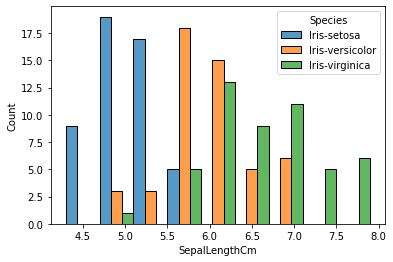

In [8]:
sb.histplot(data=df, x="SepalLengthCm", hue="Species", multiple="dodge")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

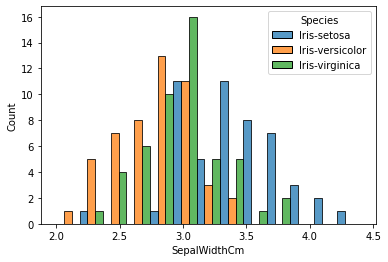

In [9]:
sb.histplot(data=df, x="SepalWidthCm", hue="Species", multiple="dodge")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

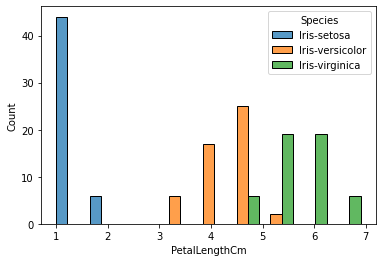

In [10]:
sb.histplot(data=df, x="PetalLengthCm", hue="Species", multiple="dodge")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

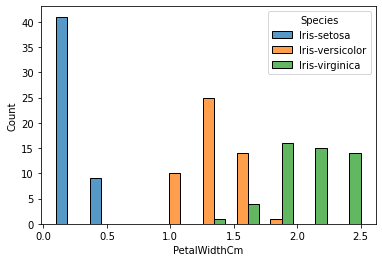

In [11]:
sb.histplot(data=df, x="PetalWidthCm", hue="Species", multiple="dodge")

#### Now we will get the target values and feature values.


In [12]:
col = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[col]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y = df.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Further, we will split the dataset into the training and test dataset.


In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Descision Tree Algorithm


In [15]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

#### Fitting the model to our train dataset.


In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predicting the values for the test dataset.


In [17]:
y_pred = model.predict(X_test)

#### Seeing the Accuracy of our trained model.


In [18]:
print("Accuracy(%):",metrics.accuracy_score(y_test,y_pred)*100,"%")

Accuracy(%): 95.55555555555556 %


#### Visualizing the Descision Tree Classifier


In [23]:
# Installing the required libraries.
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
pip install six 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install graphviz

In [19]:
# Importing the necessary libraries for the graph.
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree

[Text(558.0, 978.48, 'X[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(418.5, 761.0400000000001, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(697.5, 761.0400000000001, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(279.0, 543.6, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(139.5, 326.1600000000001, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(418.5, 326.1600000000001, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(279.0, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(558.0, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(1116.0, 543.6, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(976.5, 326.1600000000001, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(837.0, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(1116.0, 108.72000000000003, 'gini = 0.0\nsample

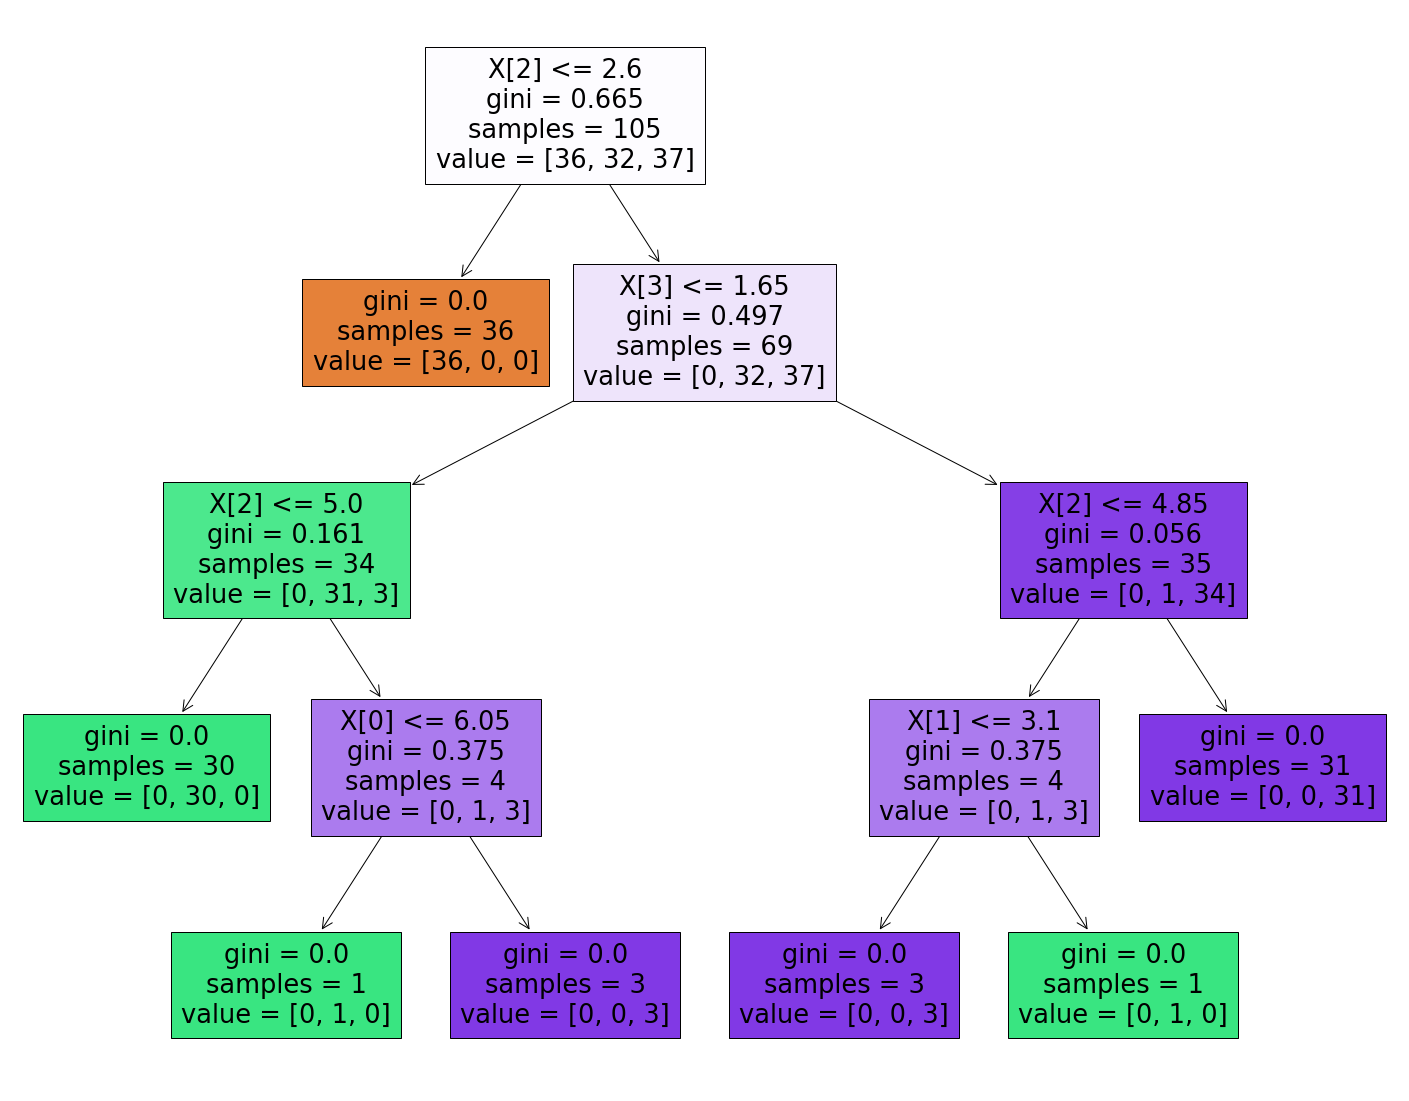

In [28]:
# Plotting the descision tree.
fig = plt.figure(figsize=(25,20)) #Defining the figure size,
tree.plot_tree(model, filled = True)